# Generate hypothetical dataset for synthetic control demonstration
A promotion was implemented in NJ on March 2023. I was to evaluate it's effect. I am using PA, MI and IL as my donor pool to create the synthetic control for NJ. 

In this dataset, I produce a baseline of Daily Active Users (DAU) and natural NFL betting volume (# of bets), added seasonality factors to reflect the seasonal nature of sports. I also added a treatment effect, an effect of the promotion, for NJ DAU and betting volume. 

In [14]:
#pip install matplotlib pandas numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
np.random.seed(42) 
states = ['NJ', 'PA', 'MI', 'IL']
dates = pd.date_range(start='2022-01-01', end='2023-06-30', freq='D')
promo_start = '2023-03-01'
print(states)
print(promo_start)

['NJ', 'PA', 'MI', 'IL']
2023-03-01


In [16]:
data = [] 

for state in states:
    print(f"Processing state: {state}")
    # State-specific baseline activity
    base_handle = np.random.uniform(10000, 20000)
    base_users = np.random.uniform(500, 1000)
    
    for date in dates:
        # Seasonal effect: Higher during football season (Sep-Feb)
        month = date.month
        season_multiplier = 1.2 if month in [9, 10, 11, 12, 1, 2] else 1.0
        
        # Random daily fluctuation
        fluctuation = np.random.normal(1.0, 0.05)
        
        # Simulate handle and DAU
        handle = base_handle * season_multiplier * fluctuation
        dau = base_users * season_multiplier * fluctuation
        
        # Average bet number, cutoff at 0 and integer
        avg_bet_num = np.random.normal(3, 1)
        while avg_bet_num < 0:
            avg_bet_num = np.random.normal(3, 1)
        avg_bet_num = int(round(avg_bet_num))  # Convert to integer
        
        # Promotion effect for NJ after March 2023
        treatment = 1 if (state == 'NJ' and date >= pd.to_datetime(promo_start)) else 0
        promo_boost = 1.3 if treatment else 1.0  # 30% lift due to promo
        
        # Apply promo boost
        handle *= promo_boost
        dau *= promo_boost

        # Append the row of data for each date
        data.append([state, date, handle, dau, avg_bet_num, treatment])

Processing state: NJ
Processing state: PA
Processing state: MI
Processing state: IL


In [17]:
# Add state-level covariates
state_covariates = []

np.random.seed(42)  # For reproducibility

for state in states:
    population = np.random.uniform(1_000_000, 20_000_000)
    median_income = np.random.uniform(40000, 80000)
    unemployment_rate = np.random.uniform(3, 8)  # %
    regulatory_strictness = np.random.randint(1, 6)  # 1 (loose) to 5 (strict)
    population_conservativeness = np.random.uniform(0.3, 0.9)
    sports_popularity_index = np.random.uniform(0.5, 1.0)
    home_team_winrate = np.random.uniform(0.4, 0.7)
    
    state_covariates.append([
        state, population, median_income, unemployment_rate,
        regulatory_strictness, population_conservativeness,
        sports_popularity_index, home_team_winrate
    ])

# Create DataFrame
covariate_df = pd.DataFrame(state_covariates, columns=[
    'State', 'Population', 'Median_Income', 'Unemployment_Rate',
    'Regulatory_Strictness', 'Population_Conservativeness',
    'Sports_Popularity_Index', 'Home_Team_Historical_Winrate'
])
df.to_csv('state_covariates.csv', index=False)
print(covariate_df.head())

  State    Population  Median_Income  Unemployment_Rate  \
0    NJ  8.116262e+06   78028.572256           6.659970   
1    PA  9.725729e+06   53348.344446           3.714334   
2    MI  5.034443e+06   47272.998688           3.917023   
3    IL  1.097072e+07   55994.438869           3.233328   

   Regulatory_Strictness  Population_Conservativeness  \
0                      5                     0.658110   
1                      3                     0.312351   
2                      4                     0.666992   
3                      4                     0.519817   

   Sports_Popularity_Index  Home_Team_Historical_Winrate  
0                 0.722916                      0.429992  
1                 0.984955                      0.649733  
2                 0.503533                      0.406919  
3                 0.728035                      0.635553  


In [18]:
# Assuming 'data' is already generated, and 'covariate_df' exists

print(f"Data length: {len(data)}")

if data:
    # Step 1: Create daily-level DataFrame
    df = pd.DataFrame(data, columns=['State', 'Date', 'Handle', 'DAU', 'AvgBetNum', 'Treatment'])
    print("\nDaily Betting Data (sample):")
    print(df.head())

    # Step 2: Display state-level covariate DataFrame
    print("\nState-Level Covariates (sample):")
    print(covariate_df.head())

    # Step 3: Merge state covariates into daily data
    df_merged = df.merge(covariate_df, how='left', left_on='State', right_on='State')

    # Step 4: Display merged data
    print("\nMerged Data (sample):")
    print(df_merged.head())

    # Optional: Export to CSV
    df_merged.to_csv('enhanced_sports_betting_data.csv', index=False)
    print("\nData exported to 'enhanced_sports_betting_data.csv'")

else:
    print("No data to display.")

print(f"\nStates: {states}")


Data length: 2184

Daily Betting Data (sample):
  State       Date        Handle          DAU  AvgBetNum  Treatment
0    NJ 2022-01-01  17028.645754  1208.332243          5          0
1    NJ 2022-01-02  16301.369502  1156.725594          3          0
2    NJ 2022-01-03  17796.896249  1262.846375          4          0
3    NJ 2022-01-04  16107.294599  1142.954272          4          0
4    NJ 2022-01-05  16112.289700  1143.308718          3          0

State-Level Covariates (sample):
  State    Population  Median_Income  Unemployment_Rate  \
0    NJ  8.116262e+06   78028.572256           6.659970   
1    PA  9.725729e+06   53348.344446           3.714334   
2    MI  5.034443e+06   47272.998688           3.917023   
3    IL  1.097072e+07   55994.438869           3.233328   

   Regulatory_Strictness  Population_Conservativeness  \
0                      5                     0.658110   
1                      3                     0.312351   
2                      4                   

In [19]:
# Add seasonality features
df['Month'] = df['Date'].dt.month
df['FootballSeason'] = df['Month'].isin([9, 10, 11, 12, 1, 2]).astype(int)

In [20]:
# Preview dataset
print(df.head())
df.to_csv('syntheticdat.csv', index=False)

  State       Date        Handle          DAU  AvgBetNum  Treatment  Month  \
0    NJ 2022-01-01  17028.645754  1208.332243          5          0      1   
1    NJ 2022-01-02  16301.369502  1156.725594          3          0      1   
2    NJ 2022-01-03  17796.896249  1262.846375          4          0      1   
3    NJ 2022-01-04  16107.294599  1142.954272          4          0      1   
4    NJ 2022-01-05  16112.289700  1143.308718          3          0      1   

   FootballSeason  
0               1  
1               1  
2               1  
3               1  
4               1  


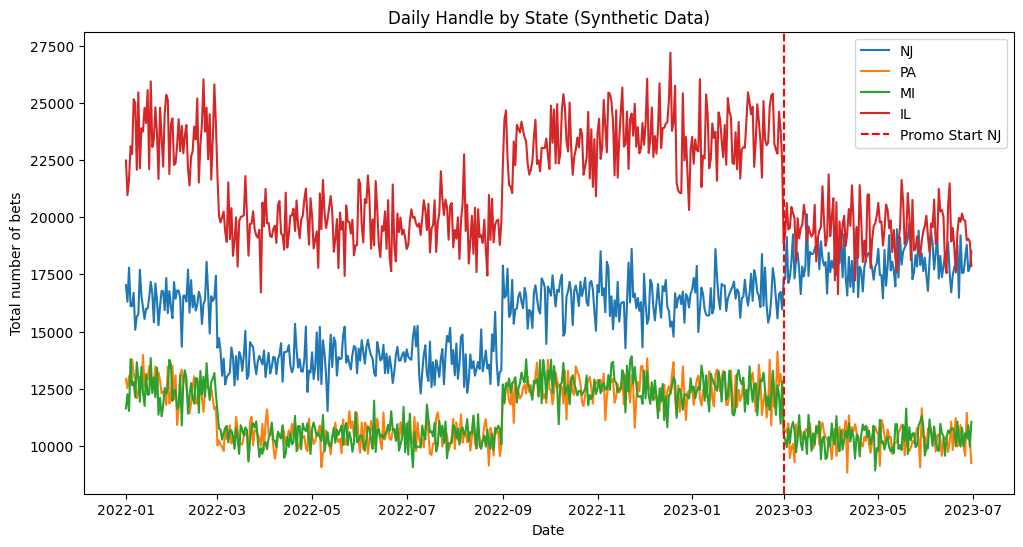

In [21]:
# Visualize
plt.figure(figsize=(12, 6))
for state in states:
    subset = df[df['State'] == state].groupby('Date')['Handle'].mean()
    plt.plot(subset.index, subset.values, label=state)
    
plt.axvline(pd.to_datetime(promo_start), color='red', linestyle='--', label='Promo Start NJ')
plt.legend()
plt.title('Daily Handle by State (Synthetic Data)')
plt.xlabel('Date')
plt.ylabel('Total number of bets')
plt.savefig('synthetic_data.png', format='png')
plt.show()